<a href="https://colab.research.google.com/github/PUNEETSUBHANJI/Netflix_movies_Tv_shows_clustering/blob/main/Netflix_Movies_Tv_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



In [ ]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<u>Importing all Necessary Libraries</u>

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import plotly.express as px
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
#All Machine learning Models are imported here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

#<u>NETFLIX MOVIES AND TV SHOWS  DATA FRAME</u>

In [ ]:
#loading the dataset
data=pd.read_csv('/content/drive/MyDrive/Projects- Almabetter_Puneet/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
data=pd.DataFrame(data)

##Data types of each column

In [ ]:
#head of data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# tail of data
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
#shape of df
data.shape

(7787, 12)

In [ ]:
#checking null values
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

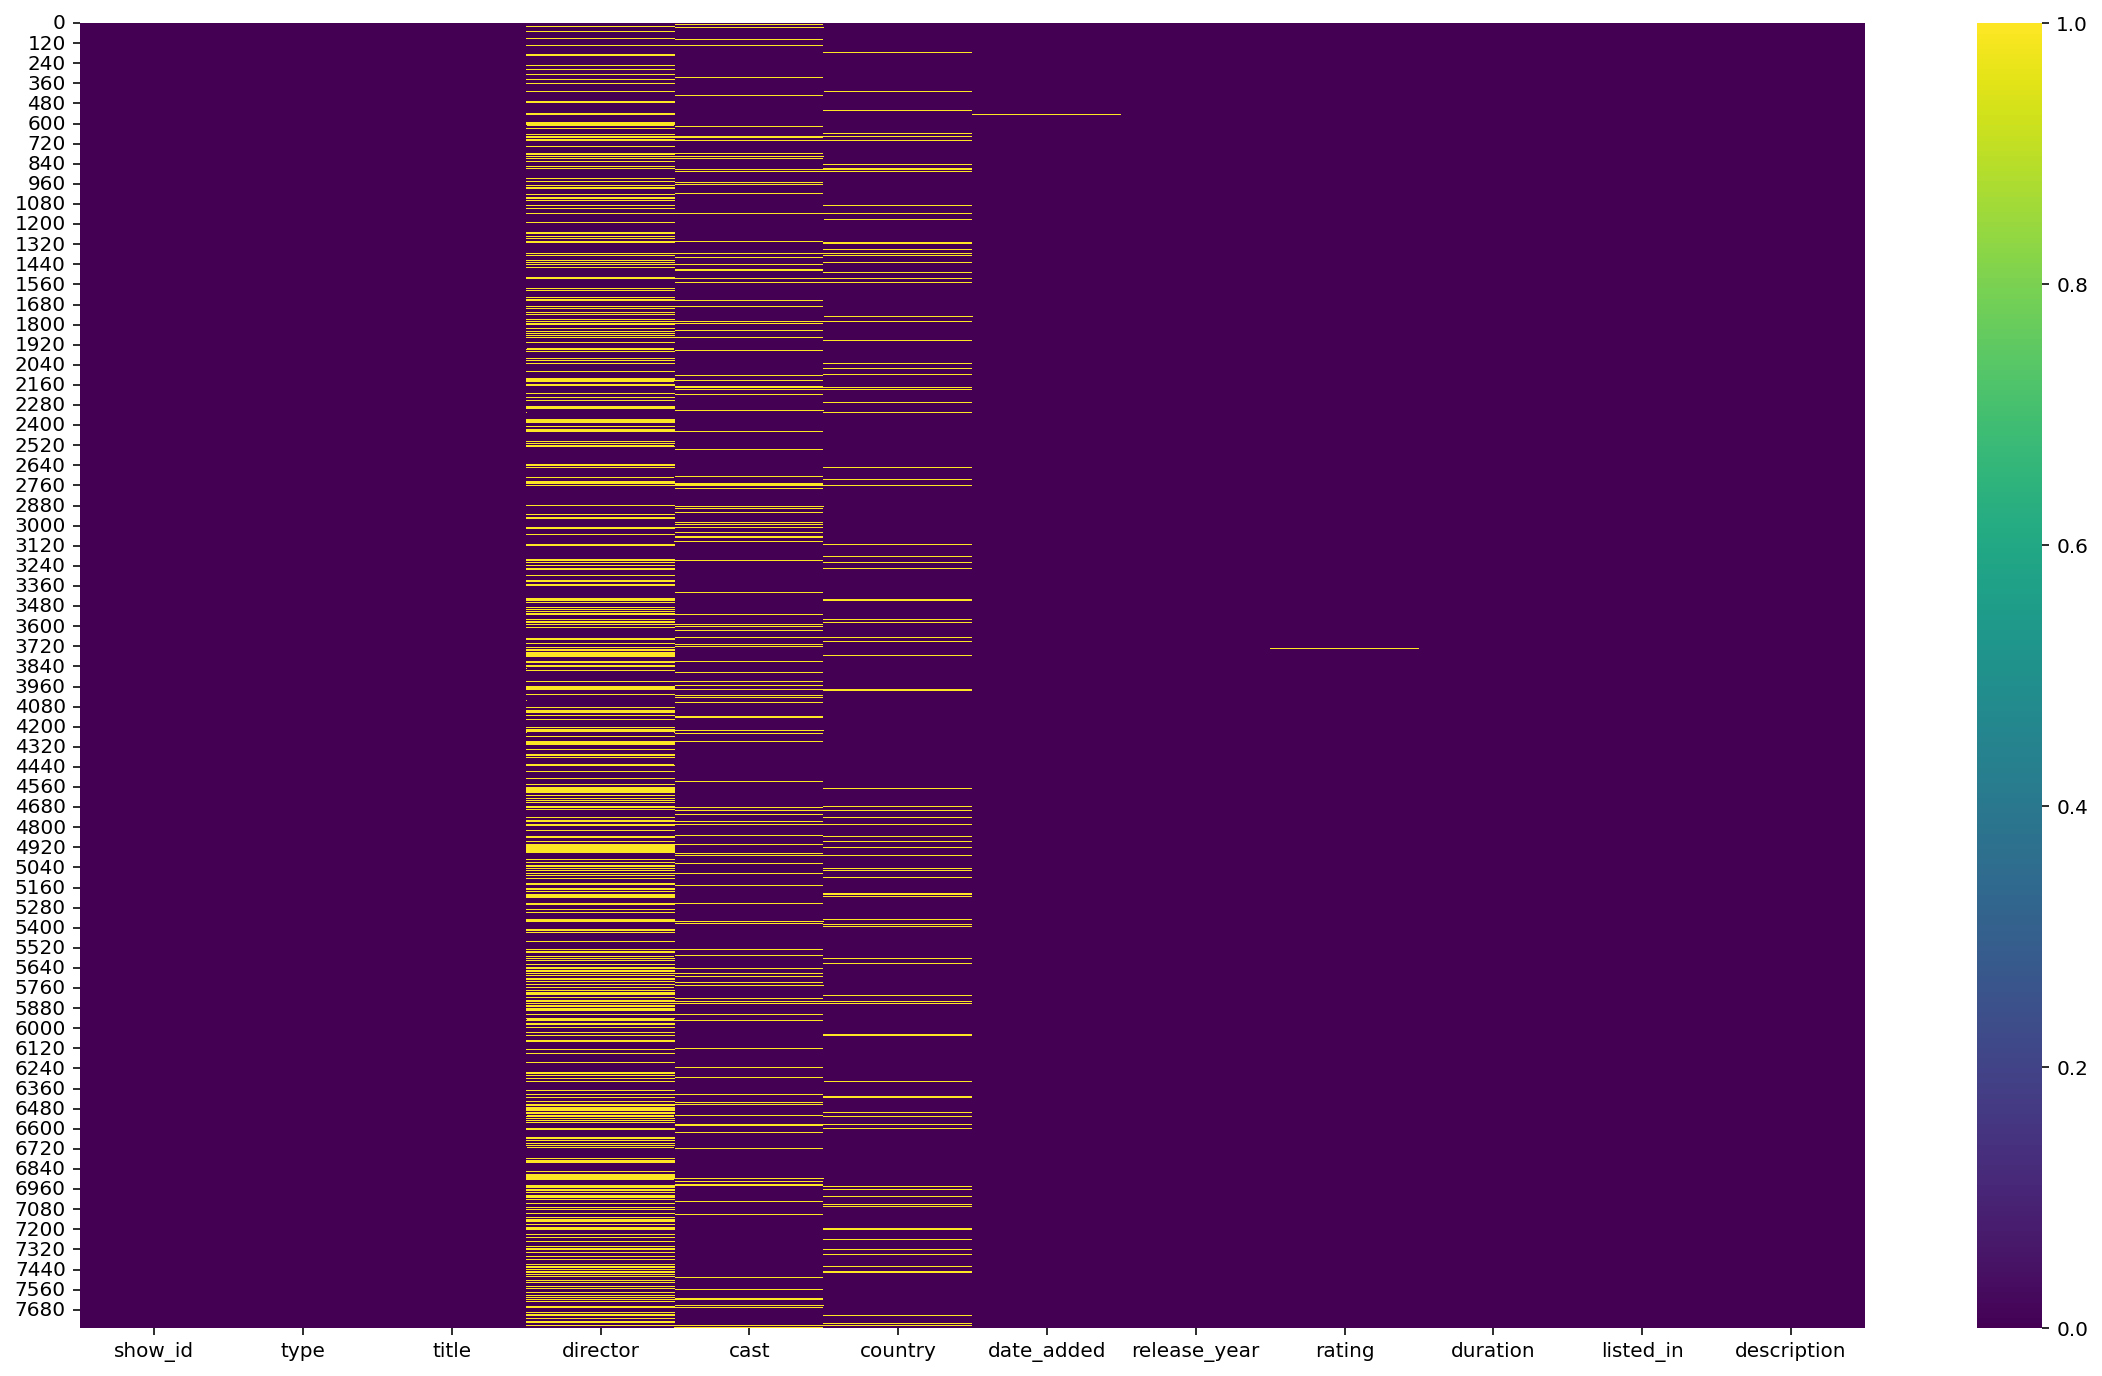

In [ ]:
#checking null values by visualizing it
plt.figure(figsize=(20,12))
sns.heatmap(data.isna(), cmap="viridis")

In [ ]:
#droping director feature from data 
data.drop(['director'],axis=1,inplace=True)
#droping all null values from cast,country,date_added and rating features 
data_cleaned=data.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [ ]:
#cheacking null values of data_cleaned variable 
data_cleaned.isnull().sum()/len(data)*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [ ]:
#using lambda funtion for country feature in data_cleaned variable
data_cleaned['country']=data_cleaned['country'].apply(lambda x:x.split(","))

In [ ]:
#creating new variable as df_new 
data_new=pd.DataFrame(columns=data_cleaned.columns)

In [ ]:
#using iterrows() function in country feature
indic=0
count=0
for index, row in data_cleaned.iterrows():
    if len(data_cleaned.loc[index,'country'])>1:
      count=len(data_cleaned.loc[index,'country'])+count
      for data in data_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(data_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        data_new.loc[indic]=country_name_list
        indic=indic+1
      data_cleaned.drop(index,inplace=True)

In [ ]:
#using reset_index() method for df_cleaned variable
data_cleaned.reset_index(drop=True,inplace=True)
data_clean_frame=data_cleaned.append(data_new,ignore_index=True)

In [ ]:
#using the lambda function for some data augmentation
data_clean_frame['country']=data_clean_frame['country'].apply(lambda x:x[0])
data_clean_frame['date_added']=data_clean_frame['date_added'].apply(lambda x:x.strip())
data_clean_frame['date_added']=data_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
data_clean_frame['release_year']=data_clean_frame['release_year'].astype('int')

In [ ]:
#changing the names of some features 
data_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [ ]:
#clean dataframe
data_clean_frame.drop([6361,6527],inplace=True)
data_clean_frame.reset_index(drop=True,inplace=True)

In [ ]:
#head of data_clean_frame
data_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#shape of data_clean_frame
data_clean_frame.shape

(8262, 11)

## Data Cleaning and Feature Engineering 

In [ ]:
#checking dtype of data_clean_frame
data_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

# 1. Exploratory Data Analysis
###i)Name the cast who has been acted more times only for Indian Movies?
###ii)What is more popular on Netflix, movies or TV shows?
###iii)Name the top two countries where Netflix is most popular?
###iv)In December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month?

__i) Name the cast who has been acted more times only for Indian Movies?__

In [ ]:
#extracing india from country column
data_india=data_clean_frame.loc[data_clean_frame['country']=='India',:]

In [ ]:
#defining stripping and returning the dates
def stripping(x):
  datas=[]
  for i in x:
    datas.append(i.strip())
  return datas

In [ ]:
#using lambda function for Actors feature in df_india variable
data_india['Actors']=data_india['Actors'].apply(lambda x:x.split(','))
data_india['Actors']=data_india['Actors'].apply(lambda x:stripping(x))

In [ ]:
#creating actors_list=[]
actors_list=[]
for i in data_india['Actors']:
  actors_list.extend(i)

In [ ]:
#top five actors who acted more times in indian movies
actors_data=pd.DataFrame(actors_list,columns=['Actors'])
actors_data=actors_data.value_counts().reset_index()
actors_data.rename(columns={0:'Count'},inplace=True)
actors_data.head(5)

,Actors,Count
0,Anupam Kher,39
1,Shah Rukh Khan,33
2,Naseeruddin Shah,29
3,Akshay Kumar,28
4,Om Puri,27


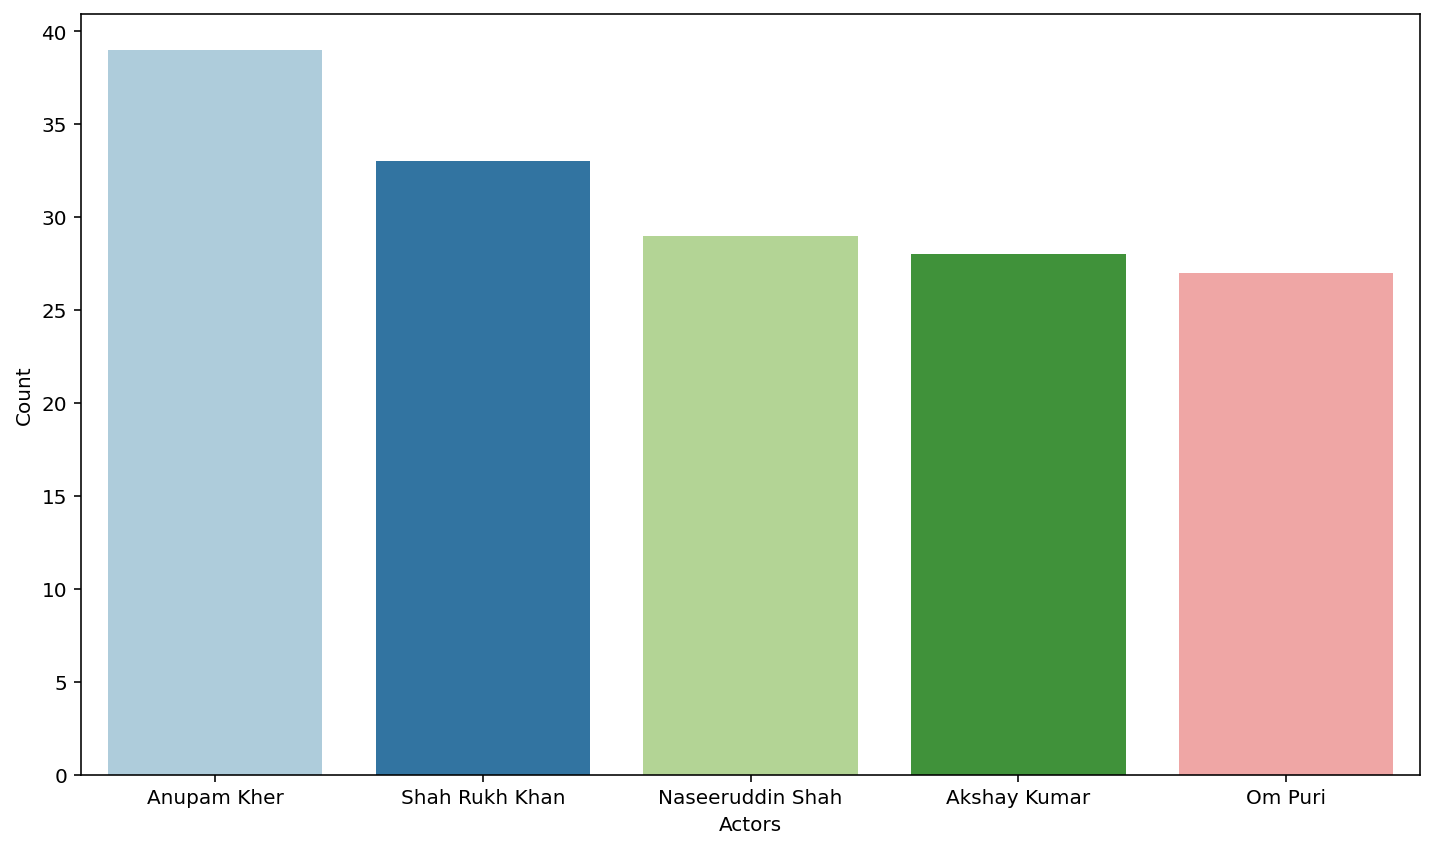

In [ ]:
#visualising top five actors who acted more times in indian movies
plt.figure(figsize=(12,7))
sns.barplot(x=actors_data['Actors'].head(5),y=actors_data['Count'].head(5), palette = 'Paired')

As we can see from the plot, Anupam Kher has acted in more Indian films than anyone else.

__ii) What is more popular on Netflix, movies or TV shows?__

In [ ]:
#Movies and Tv Shows available on netflix
movies_and_tv_shows=data_clean_frame['Type_of_show'].value_counts().reset_index()
movies_and_tv_shows

,index,Type_of_show
0,Movie,6080
1,TV Show,2182


In [ ]:
#visualising What is more popular on Netflix, movies or TV shows
(px.bar(movies_and_tv_shows, x="index",y="Type_of_show", color="index", color_discrete_map={
        'Movie': 'purple',
        'TV Show': 'green'})
.update_layout(title_font_size=50)
.update_xaxes(showgrid=True)
).show()

As we can see in the plot, there are more movies available on Netflix compared to TV shows. That means movies are more popular than TV shows.

__iii) Name the top two countries where Netflix is most popular?__

In [ ]:
#top_two countries where netflix is most popular
top_two=data_clean_frame['country'].value_counts().head(3).reset_index()
top_two

,index,country
0,United States,2541
1,India,927
2,United Kingdom,499


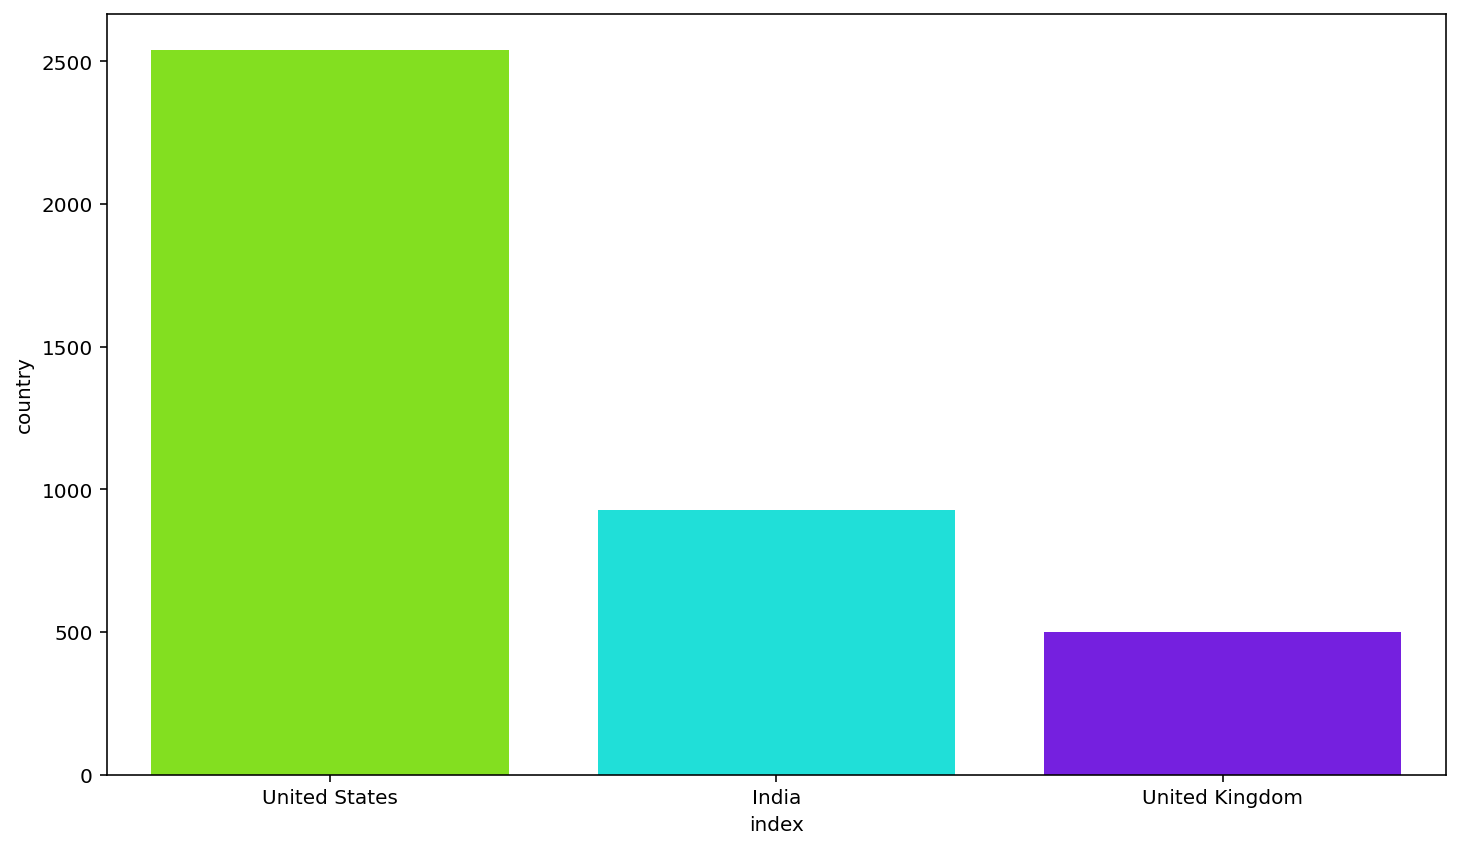

In [ ]:
#Visualising Which are the top two countries using Netfilx
plt.figure(figsize=(12,7))
sns.barplot(x=top_two['index'],y=top_two['country'], palette='hsv')

As can be seen in the plot above, the United States and India are the two countries where Netflix is most popular.

__iv) In December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month?__

In [ ]:
#creating two columns year and month in df_clean_frame variable
data_clean_frame['year']=pd.DatetimeIndex(data_clean_frame['Date_Added_in_netflix']).year
data_clean_frame['month']=pd.DatetimeIndex(data_clean_frame['Date_Added_in_netflix']).month

In [ ]:
#creating df_new11 variable
df_new11=pd.DataFrame(columns=data_clean_frame.columns)

In [ ]:
#extracting 12th month and 2020 year from month and year feature 
indic=0
for index,row in data_clean_frame.iterrows():
    if (data_clean_frame.loc[index,'month']==12) & (data_clean_frame.loc[index,'year']==2020):
      df_new11.loc[indic]=data_clean_frame.loc[index,:]
      indic=indic+1

In [ ]:
#groupby Type_of_show and Ratings
ratings_dec_2020=df_new11.groupby(['Type_of_show','Ratings'])['country'].count().reset_index().rename(columns={'country':'count'})
ratings_dec_2020

,Type_of_show,Ratings,count
0,Movie,PG,7
1,Movie,PG-13,22
2,Movie,R,20
3,Movie,TV-14,23
4,Movie,TV-G,3
5,Movie,TV-MA,33
6,Movie,TV-PG,5
7,Movie,TV-Y,4
8,Movie,TV-Y7,2
9,TV Show,TV-14,18


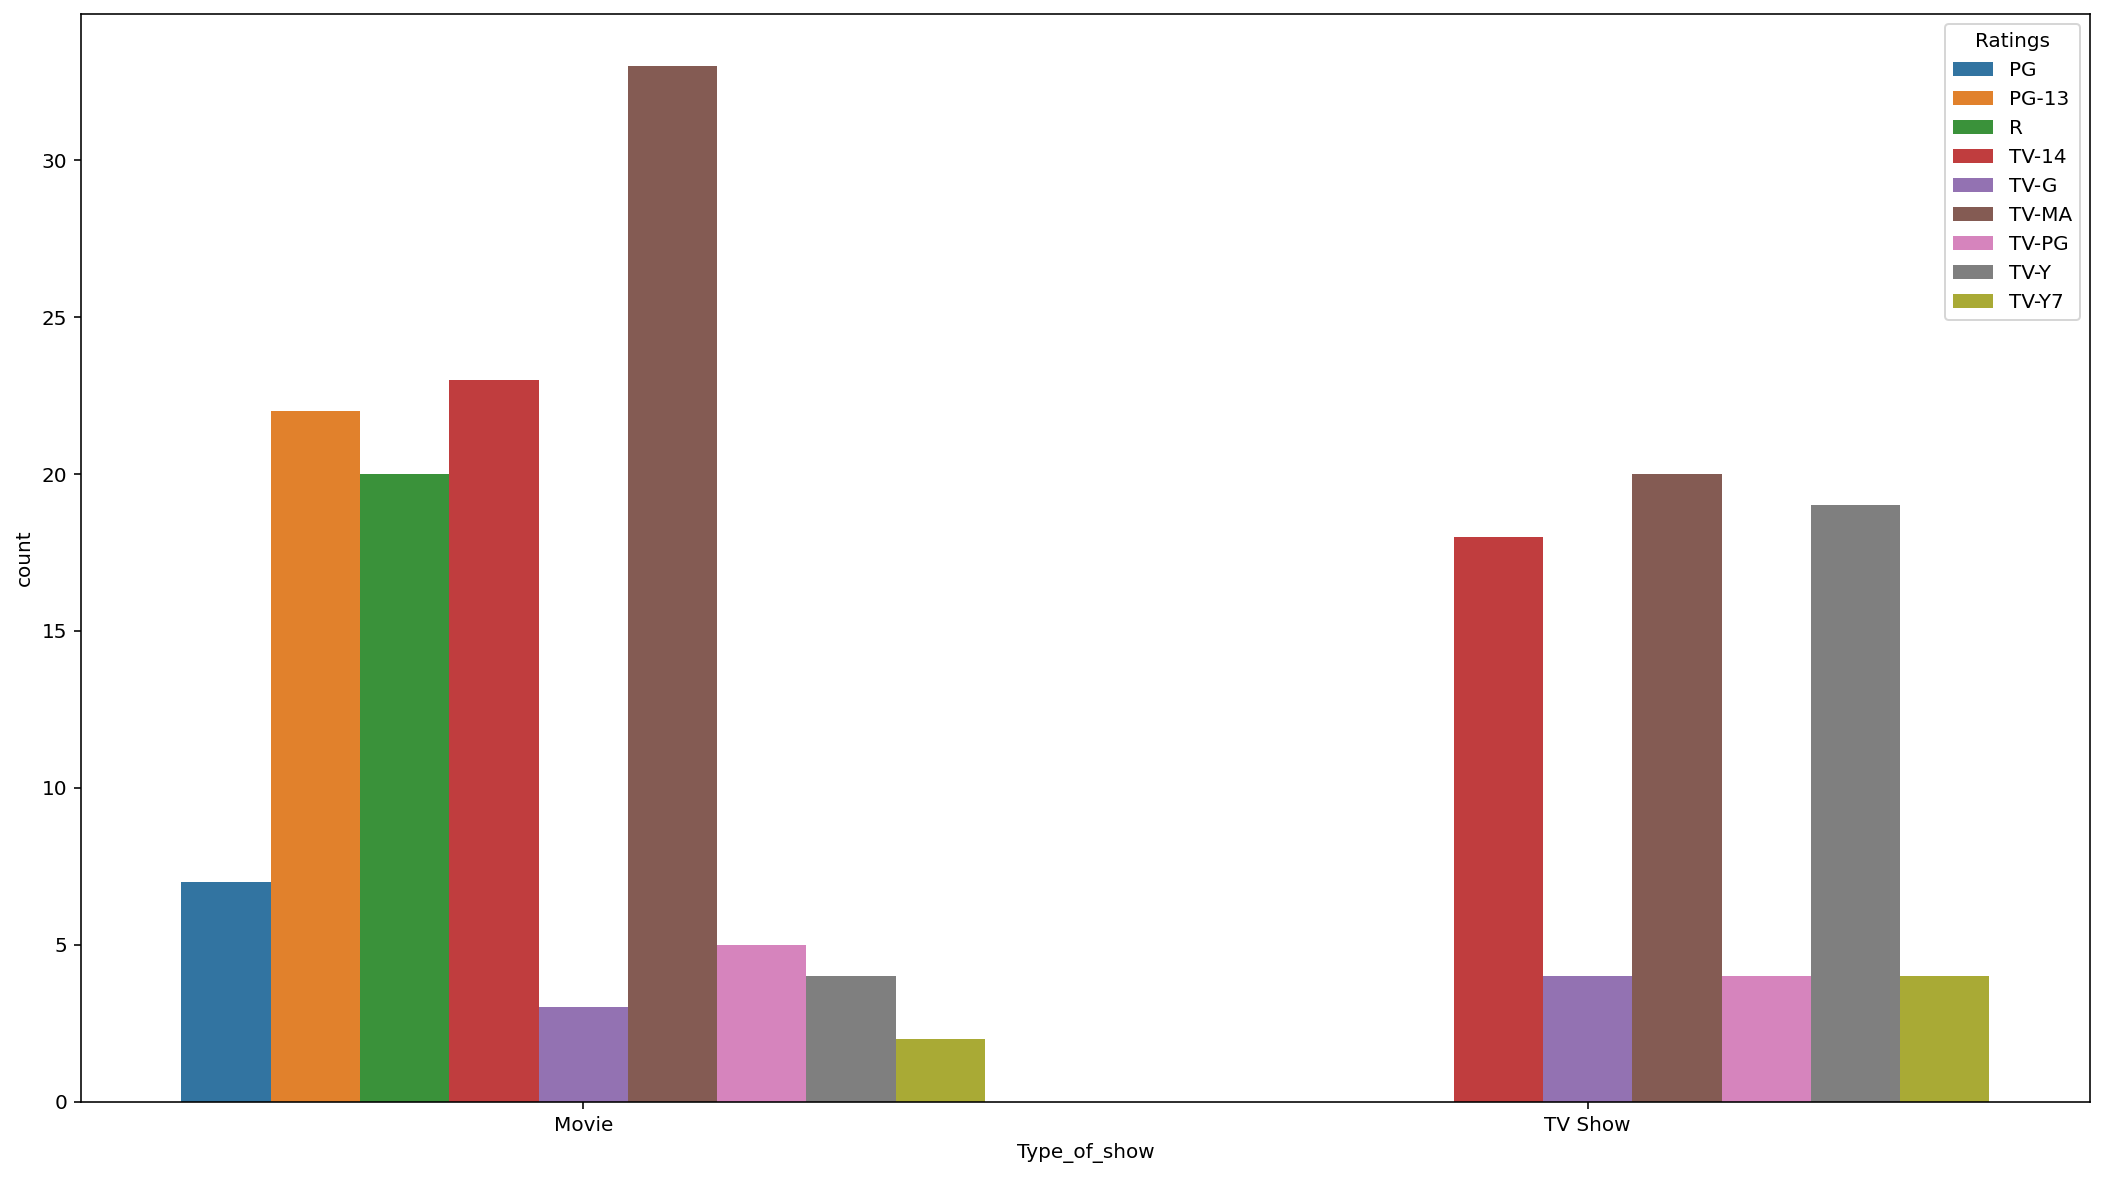

In [ ]:
#visualising in December 2020, what type of shows has been launched more and explore the highest rating of movie given to that month
plt.figure(figsize=(18,10))
sns.barplot(x=ratings_dec_2020['Type_of_show'],y=ratings_dec_2020['count'],hue=ratings_dec_2020['Ratings'])

As shown in the plot above, TV-MA ratings in December 2020 are the highest in movies and TV shows, with TV-MA standing for Mature Audience Only. Because this programme is intended for adults, it may not be appropriate for children under the age of 17.

# 2. Understanding what type content is available in different countries


In [ ]:
#groupby country and Ratings feature
content_different_countries = data_clean_frame.groupby(['country','Ratings'])['Actors'].count().reset_index()
content_different_countries.drop('Actors',axis=1,inplace=True)

In [ ]:
#visualising what type content is available in different countries
(px.bar(content_different_countries, x="Ratings",y="country", color="country")
.update_layout(title_font_size=200)
.update_xaxes(showgrid=True)
).show()

As we can see from the plot above, there are various types of content available, but in most countries, TV-MA content is available, and the TV-MA rating you see on many Netflix TV series signifies that the programme is only suitable for mature viewers. A TV show with a TV-MA rating features graphic violence or a combination of brutal violence. So that could be the reason for it, because the Netflix audience enjoys this type of content. 

# 3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [ ]:
#groupby year and type of show feature
tv_rather_than_movies=data_clean_frame.groupby(['year','Type_of_show'])['show_id'].count().reset_index().rename(columns={'show_id':'count'})

In [ ]:
#visualising type_of_show feature w.r.t. years
data1 = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(tv_rather_than_movies, x='year', y='count', color='Type_of_show')
fig.show()

In the plot above, we can see that Netflix has been increasingly focusing on movies rather than TV shows in recent years, as evidenced by the fact that after 2014, Netflix has relied more on movies than TV shows.

# Making some hypothesis from the data visualized

In [ ]:
#making copy of data_clean_frame
data_hypothesis=data_clean_frame.copy()

In [ ]:
#head of data_hypothesis
data_hypothesis.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,year,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
#filtering movie from Type_of_show column
data_hypothesis = data_hypothesis[data_hypothesis["Type_of_show"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data_hypothesis['target_ages'] = data_hypothesis['Ratings'].replace(ratings_ages)
#let's see unique target ages 
data_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
data_hypothesis['target_ages'] = pd.Categorical(data_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
#from duration feature extractin string part and after extracting Changing the object type to numeric
data_hypothesis['duration']= data_hypothesis['duration'].str.extract('(\d+)')
data_hypothesis['duration'] = pd.to_numeric(data_hypothesis['duration'])

In [ ]:
#head of data_hypothesis
data_hypothesis.head(3)

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,year,month,target_ages
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Teens


In [ ]:
#group_by duration and target_ages                 
group_by_= data_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,74.622407
1,Older Kids,95.322718
2,Teens,111.754748
3,Adults,100.947937


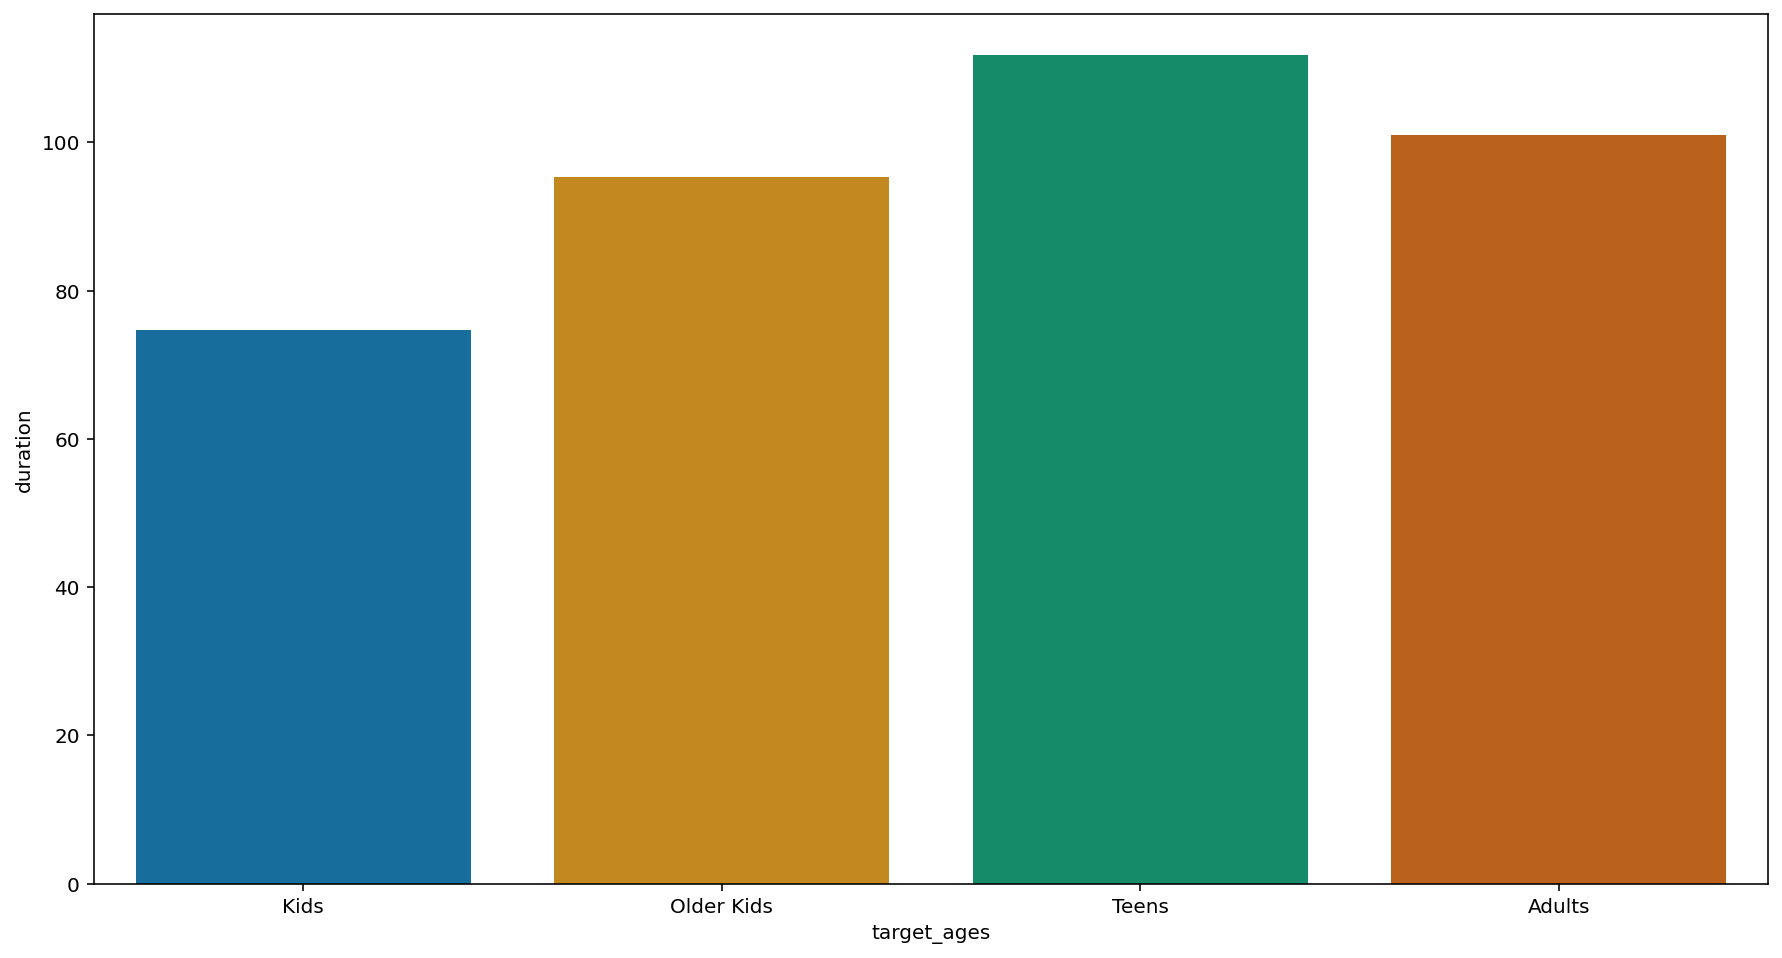

In [ ]:
#visualising target_ages w.r.t. duration feature
plt.figure(figsize=(15,8))
sns.barplot(x=group['target_ages'],y=group['duration'], palette='colorblind')

As shown in the graph above, teens have the longest average duration of time for movies, while kids have the lowest.

**Hypothesis- kids and older kids rated movies are of atleast 2 hours long.**

In [ ]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')

In [ ]:
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    74.622407
dtype: float64 
 Mean for  movies rated for older kids duration    95.322718
dtype: float64
Std for  movies rated for Older Kids duration    27.895697
dtype: float64 
 Std for  movies rated for kids duration    28.817431
dtype: float64


In [ ]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

241 942
dof 1181
SP_2 = duration    819.821248
dtype: float64
SP duration    28.632521
dtype: float64
tvalue -10.015182906255275


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9619747067977586

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9619747067977582

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

# 4. Clustering similar content by matching text-based features

In [ ]:
#head of df_clean_frame
data_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description,year,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
#using tolist() function to Convert description column to list 
context = data_clean_frame['description'].tolist()
context

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.',
 'A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.',
 'After an awful accident, a couple admitted to a grisly hospital are separated and must find each o

In [ ]:
#using  lower() method for Changing the string into lower case
context = [low.lower() for low in context]
#using sub() function for Handling all the urls and (@) present in context variable 
context = [re.sub("\w+://\S+","", urls) for urls in context]
context =[re.sub("@\w+","", handles) for handles in context]

In [ ]:
#using tokenization functions for the text present in context variable
context= [word_tokenize(word) for word in context]

In [ ]:
#Removing stopwords and punctuation from the description feature 
removing_stopword= stopwords.words("english")
removing_punctuation= list(punctuation)
removing_punctuation.extend(['...','``',"''",".."])
removing_context_= ['rt', 'amp',"'s"]
final_variable= removing_stopword + removing_punctuation + removing_context_

In [ ]:
#defining final_stop function to remove the stop words
def final_stop(final):
    return [re.sub("#","",term) for term in final if ((term not in final_variable) & (len(term)>1))]
context_clean = [final_stop(clean) for clean in context]

In [ ]:
#creating a cleaned_list where all the words of the cleaned data is present and getting top 10 words using counter over top_term variable 
cleaned_list= []
for i in context_clean:
    cleaned_list.extend(i)
top_terms= Counter(cleaned_list)
top_terms.most_common(10)

[('young', 778),
 ('life', 714),
 ('new', 655),
 ('family', 610),
 ('man', 529),
 ('world', 502),
 ('woman', 488),
 ('love', 446),
 ('two', 445),
 ('must', 411)]

In [ ]:
#using join method to form a string by Joining all the words 
context_clean = [" ".join(label) for label in context_clean]

# TFIDF

In [ ]:
#tfid_vectorizer variable 
tfid_vectorizer= TfidfVectorizer()

In [ ]:
#using tfid_vectorizer for fiting content_clean variable and converting it into arrays 
context_tfidf = tfid_vectorizer.fit_transform(context_clean).toarray()

In [ ]:
#shape of content_tfidf
context_tfidf.shape

(8262, 16635)

In [ ]:
#content_tfidf
context_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

As we can see, the context_tfidf variable has 8262 rows and 16635 columns, which is far too enormous, so we'll use PCA to shrink it.